In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
DATA_FILE = 'data_finish.csv'

In [3]:
wine_data = pd.read_csv(DATA_FILE)

wine_data.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,1951.055410,6.959823,0.273162,0.339031,6.363479,0.043810,35.358135,140.265760,0.994187,3.194655,0.488761,10.458802,5.890486
std,1127.858131,0.830452,0.095384,0.116485,4.983439,0.014379,16.511794,42.892305,0.002883,0.153556,0.114007,1.208609,0.907069
min,0.000000,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,973.250000,6.400000,0.210000,0.270000,1.700000,0.035000,23.000000,109.000000,0.991893,3.090000,0.410000,9.400000,5.000000
50%,1953.500000,6.900000,0.260000,0.320000,5.200000,0.042000,34.000000,137.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,2929.750000,7.400000,0.320000,0.390000,9.800000,0.050000,46.000000,170.000000,0.996300,3.290000,0.550000,11.300000,6.000000
max,3897.000000,10.700000,0.760000,0.880000,26.050000,0.152000,118.500000,344.000000,1.002950,3.820000,1.000000,14.000000,9.000000


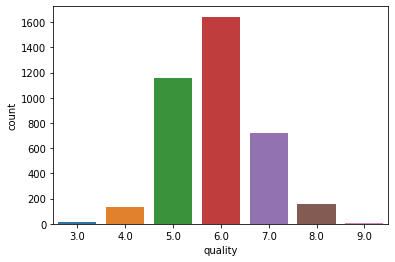

In [4]:
sns.countplot(data=wine_data, x='quality')
plt.show()

In [5]:
# 数据预处理
# wine_data.loc[wine_data['quality'] <= 5, 'quality'] = 0
# wine_data.loc[wine_data['quality'] >= 1, 'quality'] = 1

In [6]:
# 所有列名
all_cols = wine_data.columns.tolist()

In [7]:
# 特征列名称
feat_cols = all_cols[1:-1]

In [8]:
feat_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
# 特征
X = wine_data[feat_cols].values
# 标签
y = wine_data['quality'].values
X_pd = pd.DataFrame(X)
X_pd.columns = feat_cols
X_pd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000,3826.000000
mean,6.959823,0.273162,0.339031,6.363479,0.043810,35.358135,140.265760,0.994187,3.194655,0.488761,10.458802
std,0.830452,0.095384,0.116485,4.983439,0.014379,16.511794,42.892305,0.002883,0.153556,0.114007,1.208609
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000
25%,6.400000,0.210000,0.270000,1.700000,0.035000,23.000000,109.000000,0.991893,3.090000,0.410000,9.400000
50%,6.900000,0.260000,0.320000,5.200000,0.042000,34.000000,137.000000,0.993900,3.180000,0.470000,10.300000
75%,7.400000,0.320000,0.390000,9.800000,0.050000,46.000000,170.000000,0.996300,3.290000,0.550000,11.300000
max,10.700000,0.760000,0.880000,26.050000,0.152000,118.500000,344.000000,1.002950,3.820000,1.000000,14.000000


In [10]:
# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [11]:
# 特征归一化
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 建立模型
mlp = MLPClassifier(hidden_layer_sizes=(80,100,100,100), activation='relu')
mlp.fit(X_train_scaled, y_train)
print(X_test_scaled.shape,y_test.shape)
accuracy = mlp.score(X_test_scaled, y_test)
print('神经网络模型已有数据的预测准确率：{:.2f}%'.format(accuracy * 100))

(1276, 11) (1276,)
神经网络模型已有数据的预测准确率：52.74%


In [28]:
# 添加二分类
def chargeQuality(y):
    # 对红酒的质量进行分类
    return y # (y > 5).astype(int)

In [29]:
# 载入预测数据
testFileName = "附件1.xlsx"
testSheet = "待预测数据集"
data_test = pd.read_excel(testFileName,testSheet)

# 载入预测数据参考值
markFileName = "data_quatily.csv"
data_mark = pd.read_csv(markFileName)
data_mark = data_mark["quality"]
y_test_mark = chargeQuality(data_mark)

In [30]:
data_test_scaled = scaler.fit_transform(data_test)
print(data_test_scaled.shape,y_test_mark.shape)

(1000, 11) (1000,)


In [31]:
accuracy = mlp.predict(data_test_scaled)

6.0    534
5.0    274
7.0    150
4.0     25
8.0     13
3.0      4
dtype: int64

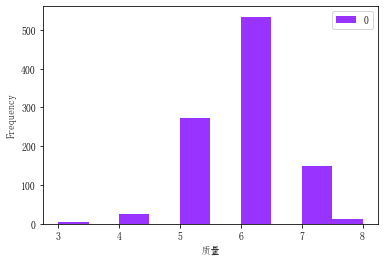

In [34]:
# 绘制预测结果
out_data = pd.DataFrame(accuracy)
ax = out_data.plot.hist(color='#9933FF')
plt.rcParams['font.sans-serif'] = ['FangSong'] 
# ax.set_title('红酒质量分布', fontsize=14)
ax.set_xlabel('质量')
out_data.value_counts()

In [21]:
print(accuracy_score(accuracy,y_test_mark))
print(log_loss(accuracy,y_test_mark))

0.527


ValueError: y_true and y_pred contain different number of classes 5, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [3. 4. 5. 6. 7.]

In [18]:
# 输出最终的预测结果
predict_data = pd.DataFrame(accuracy)
predict_data.to_csv("predict_of_2Level_MPL.csv")

In [19]:
predict_data_RF = pd.read_csv("predict_of_2Level.csv")
predict_data = pd.read_csv("predict_of_2Level_MPL.csv")

predict_data_RF = pd.Series(predict_data_RF['0'].values, index=predict_data_RF['0'])
predict_data = pd.Series(predict_data['0'].values, index=predict_data['0'])
print(type(y_test_mark))
print(type(predict_data_RF))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [20]:
# 读取随机森林的结果并对比

print(accuracy_score(predict_data,predict_data_RF))
print(log_loss(predict_data,predict_data_RF))

0.57


ValueError: y_true and y_pred contain different number of classes 5, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [3. 4. 5. 6. 7.]